In [1]:
from dotenv import load_dotenv
import os

load_dotenv()  # loads .env file from current directory
API_KEY = os.getenv("api_key")

print("API Key loaded successfully:", bool(API_KEY))  


API Key loaded successfully: True


In [2]:
import requests #interacting with api 
import json 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [3]:
api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

parameters = {
    'api_key': API_KEY,
    'qopts.per_page': 10000  # Number of rows to fetch

}
json_data=requests.get(api_url, params=parameters).json() #requesting to get data


In [4]:
data= json_data['datatable']['data'] # we get the values from the dict not the column headers


In [5]:
json_data['datatable']['columns'] #saw name is the useful header

[{'name': 'compnumber', 'type': 'Integer'},
 {'name': 'reportid', 'type': 'Integer'},
 {'name': 'mapcode', 'type': 'Integer'},
 {'name': 'amount', 'type': 'BigDecimal(36,14)'},
 {'name': 'reportdate', 'type': 'Date'},
 {'name': 'reporttype', 'type': 'String'},
 {'name': 'auditorstatus', 'type': 'String'},
 {'name': 'currency', 'type': 'String'},
 {'name': 'consolidated', 'type': 'String'},
 {'name': 'longname', 'type': 'String'},
 {'name': 'shortname', 'type': 'String'},
 {'name': 'status', 'type': 'String'},
 {'name': 'countrycode', 'type': 'String'},
 {'name': 'region', 'type': 'String'},
 {'name': 'cik', 'type': 'Integer'},
 {'name': 'mic', 'type': 'String'},
 {'name': 'ticker', 'type': 'String'},
 {'name': 'exchange', 'type': 'String'},
 {'name': 'address1', 'type': 'String'},
 {'name': 'address2', 'type': 'String'},
 {'name': 'address3', 'type': 'String'},
 {'name': 'address4', 'type': 'String'},
 {'name': 'city', 'type': 'String'},
 {'name': 'statecode', 'type': 'String'},
 {'nam

In [6]:
columns=[col['name'] for col in json_data['datatable']['columns']]
columns

['compnumber',
 'reportid',
 'mapcode',
 'amount',
 'reportdate',
 'reporttype',
 'auditorstatus',
 'currency',
 'consolidated',
 'longname',
 'shortname',
 'status',
 'countrycode',
 'region',
 'cik',
 'mic',
 'ticker',
 'exchange',
 'address1',
 'address2',
 'address3',
 'address4',
 'city',
 'statecode',
 'country',
 'zipcode',
 'phonenumber',
 'faxnumber',
 'website',
 'fye',
 'indicator',
 'statement']

In [7]:
df= pd.DataFrame(data,columns=columns) 
df.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

In [9]:
# report date is an object so we need it to convert to date time formatabs
df['reportdate']=pd.to_datetime(df['reportdate'],errors='coerce') #error=coerce just in case we have missing values it replaces with nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   compnumber     10000 non-null  int64         
 1   reportid       10000 non-null  int64         
 2   mapcode        10000 non-null  int64         
 3   amount         10000 non-null  float64       
 4   reportdate     10000 non-null  datetime64[ns]
 5   reporttype     10000 non-null  object        
 6   auditorstatus  9999 non-null   object        
 7   currency       10000 non-null  object        
 8   consolidated   10000 non-null  object        
 9   longname       10000 non-null  object        
 10  shortname      10000 non-null  object        
 11  status         10000 non-null  object        
 12  countrycode    10000 non-null  object        
 13  region         10000 non-null  object        
 14  cik            10000 non-null  int64         
 15  mic            10000

## DATA CLEANING

In [10]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']
df=df[necessary_columns]
df.head()

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived


In [32]:
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland',
    'IND': 'India',
    'AUS': 'Australia',
    'CAN': 'Canada',
    'BRA': 'Brazil',
    'IDN': 'Indonesia',
    'FIN': 'Finland',
    'CHE': 'Switzerland',
    'ISR': 'Israel',
    'KOR': 'South Korea',
    'GBR': 'United Kingdom',
    'FRA': 'France',
    'CHL': 'Chile',
    'BEL': 'Belgium',
    'ITA': 'Italy',
    'HKG': 'Hong Kong',
    'DNK': 'Denmark',
    'ESP': 'Spain'
}
df['country_name']=df['country'].map(country_mapping)
df.head()

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement,country_name
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived,NaN
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived,NaN
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived,NaN
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived,NaN
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived,NaN


In [25]:
unique_codes = df['country'].unique()
print(unique_codes)
print("Total unique country codes:", len(unique_codes))


['Germany' 'Canada' 'Israel' 'Finland' 'India' 'Brazil' 'Indonesia'
 'Australia' 'Bahamas' 'Cayman Islands' 'Belgium' 'France'
 'United Kingdom' 'Chile' 'United States of America' 'Japan' 'South Korea'
 'Spain' 'Italy' 'Hong Kong' 'Denmark' 'Ireland' 'Switzerland']
Total unique country codes: 23


In [26]:
missing_codes=[code for code in unique_codes if code not in country_mapping] 
missing_codes

['Germany',
 'Canada',
 'Israel',
 'Finland',
 'India',
 'Brazil',
 'Indonesia',
 'Australia',
 'Bahamas',
 'Cayman Islands',
 'Belgium',
 'France',
 'United Kingdom',
 'Chile',
 'United States of America',
 'Japan',
 'South Korea',
 'Spain',
 'Italy',
 'Hong Kong',
 'Denmark',
 'Ireland',
 'Switzerland']

In [47]:
df['country']=df['country'].replace(country_mapping)
df.drop(columns='country_name',inplace=True)

In [48]:
df.columns = [
    'report_id',
    'report_date',
    'report_type',
    'amount',
    'company_name',
    'country',
    'region',
    'indicator',
    'statement'
]
df.head(2)

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,Germany,Europe,Accrued Expenses Turnover,Derived


In [50]:
df['country'].value_counts()

United States of America    3253
Cayman Islands              1556
Japan                       1303
Ireland                     1155
Bahamas                      898
India                        608
Switzerland                  554
Australia                    228
Canada                       106
Brazil                        62
South Korea                   54
United Kingdom                51
France                        33
Chile                         22
Indonesia                     21
Finland                       16
Belgium                       14
Italy                         14
Hong Kong                     12
Denmark                       12
Israel                        12
Spain                          8
Germany                        8
Name: country, dtype: int64

In [51]:
df['indicator'].value_counts()

EBITDA                                           291
EBITDA Margin                                    289
Total Assets Per Share                           244
Shares Outstanding                               239
EPS - Net Income - Diluted                       232
Free Cash Flow Per Share                         232
Revenue Per Share                                230
EPS - Net Income - Basic                         230
Weighted Average Shares Outstanding - Diluted    228
Weighted Average Shares Outstanding - Basic      227
Cash From Investing                              220
Net Income                                       220
Cash, Beginning of Year                          220
Cash From Operations                             219
Calculated Tax Rate                              219
Cash, End of Year                                219
Total Assets                                     217
Net Margin                                       217
Cash and Equivalents                          

The indicators are been split kinda unifromly in the data given that it has 10000 rows , but i saw that The EBITDA Margin has the most count
EBITDA Margin is basically net profit but it calculates without the taxes which is a great indicator across the countries

In [52]:
filtered_df=df[df['indicator']=='EBITDA Margin'].copy() 
filtered_df.head()

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
662,1868192512,2011-06-30,A,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
768,1918804736,2014-06-30,A,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
845,1851368960,2010-12-31,A,26.841546,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived
889,1851369024,2010-12-31,Q4,14.403761,Ultrapetrol (Bahamas) Ltd,Bahamas,Latin America,EBITDA Margin,Derived


In [53]:
filtered_df.describe()

,report_id,amount
count,2.890000e+02,289.000000
mean,1.747260e+09,-353.917085
std,1.693446e+08,5191.939353
min,1.504051e+09,-86142.858937
25%,1.569850e+09,13.932416
50%,1.868169e+09,17.234169
75%,1.901958e+09,26.044164
max,1.952476e+09,47.410116


In [54]:
# the mean doesnt look normal so this data defintely has outlier
filtered_df.sort_values(by='amount')

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
768,1918804736,2014-06-30,A,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
662,1868192512,2011-06-30,A,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
2203,1851368960,2010-12-31,A,-26.841528,China Unicom (Hong Kong) Ltd,Hong Kong,Asia Pacific,EBITDA Margin,Derived
2205,1868239616,2011-12-31,A,-22.854944,China Unicom (Hong Kong) Ltd,Hong Kong,Asia Pacific,EBITDA Margin,Derived
...,...,...,...,...,...,...,...,...,...
2048,1868192544,2011-06-30,Q2,43.551968,BCE Inc,Canada,North America,EBITDA Margin,Derived
2054,1885040144,2012-03-31,Q1,43.756366,BCE Inc,Canada,North America,EBITDA Margin,Derived
2045,1868169232,2011-03-31,Q1,44.872369,BCE Inc,Canada,North America,EBITDA Margin,Derived
2058,1885087024,2012-09-30,Q3,45.624247,BCE Inc,Canada,North America,EBITDA Margin,Derived


In [59]:
filtered_df[filtered_df['company_name'] == 'Immutep Ltd']
# the data for this company is causing problem so either we can drop the company as it has only 3 rows or jsut drop the rows 

,report_id,report_date,report_type,amount,company_name,country,region,indicator,statement
662,1868192512,2011-06-30,A,-1979.328191,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
768,1918804736,2014-06-30,A,-86142.858937,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived
817,1935675392,2015-06-30,A,-19363.385060,Immutep Ltd,Australia,Asia Pacific,EBITDA Margin,Derived


In [64]:
filtered_df = filtered_df[filtered_df['company_name'] != 'Immutep Ltd']

In [65]:
filtered_df.describe()

,report_id,amount
count,2.860000e+02,286.000000
mean,1.745579e+09,18.194177
std,1.694033e+08,13.189965
min,1.504051e+09,-26.841528
25%,1.569850e+09,14.146726
50%,1.859769e+09,17.296259
75%,1.901952e+09,26.055693
max,1.952476e+09,47.410116


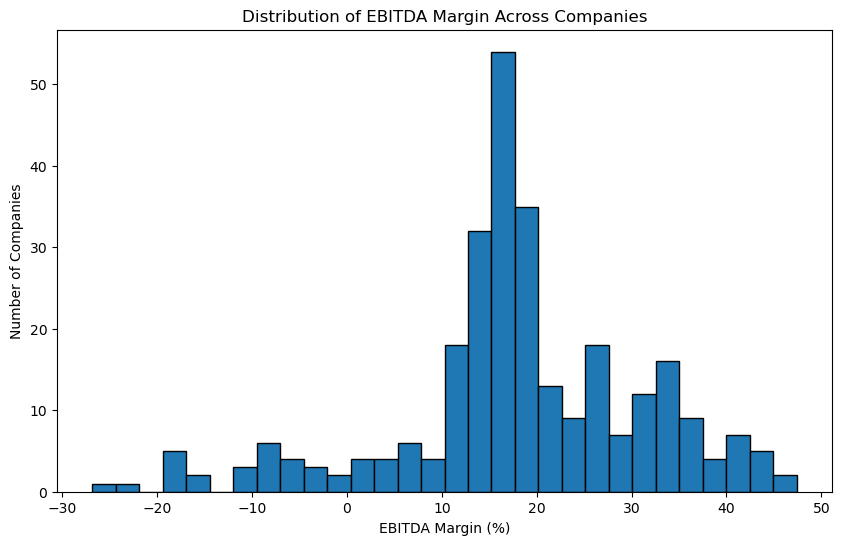

In [66]:

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['amount'], bins=30, edgecolor='black')
plt.xlabel('EBITDA Margin (%)')
plt.ylabel('Number of Companies')
plt.title('Distribution of EBITDA Margin Across Companies')
plt.show()

### Findings: Distribution of EBITDA Margin Across Companies

The histogram shows the overall distribution of EBITDA margins among companies in the dataset. Most companies have EBITDA margins clustered between **10% and 25%**, with a noticeable peak around **15%**, indicating that this is the most common profitability level. A few companies have **negative margins**, suggesting operating losses, while others achieve margins above **40%**, marking them as strong performers. The distribution is slightly **right-skewed**, meaning that while most companies earn moderate profits, a few achieve significantly higher profitability levels. Overall, the majority of firms operate within a healthy profit range, with limited extreme outliers.


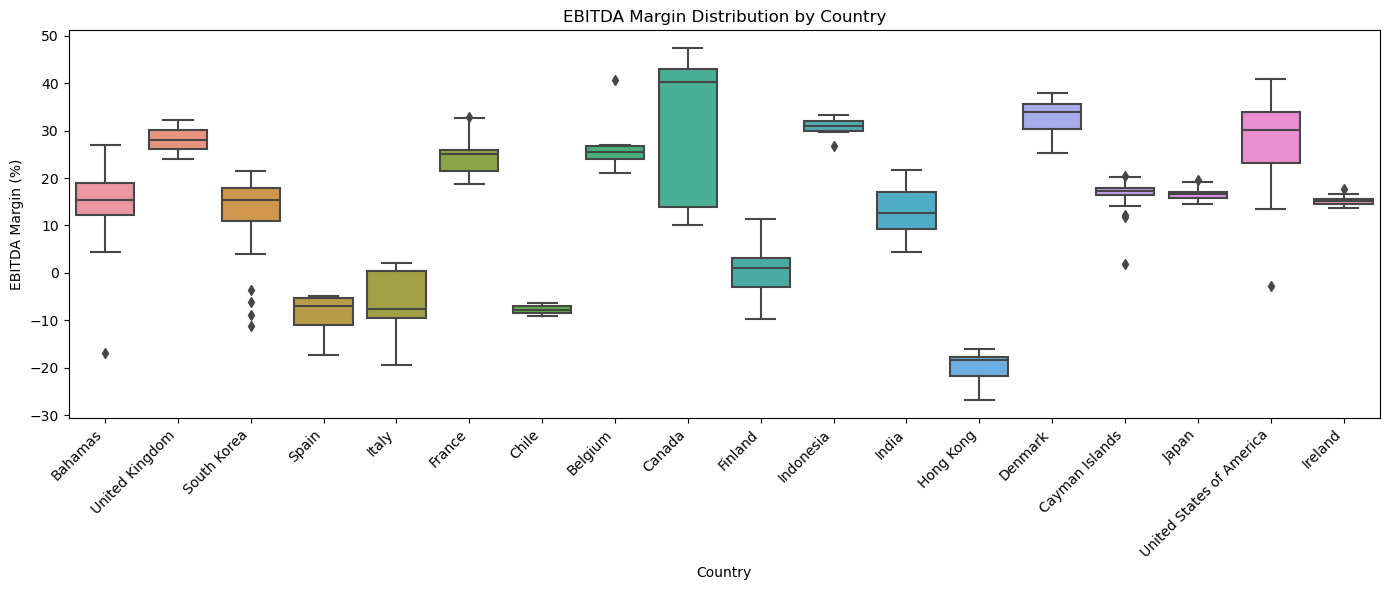

In [71]:
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='country', y='amount')
plt.xlabel('Country')
plt.ylabel('EBITDA Margin (%)')
plt.title('EBITDA Margin Distribution by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Findings: EBITDA Margin Distribution by Country

The box plot compares EBITDA margin distributions across different countries, highlighting both performance levels and consistency. Countries like the **United Kingdom, United States, and Denmark** show relatively **high and stable profitability**, with small boxes indicating consistent performance among companies. In contrast, countries such as **Canada** and **Spain** exhibit a **wide spread**, suggesting large differences in performance between companies. Some nations, like **Italy and Chile**, have **negative medians**, indicating that many companies operate at a loss. The presence of several outliers across multiple countries suggests that a few firms deviate significantly from typical profitability trends. Overall, the plot reveals that profitability and financial stability vary notably across regions.


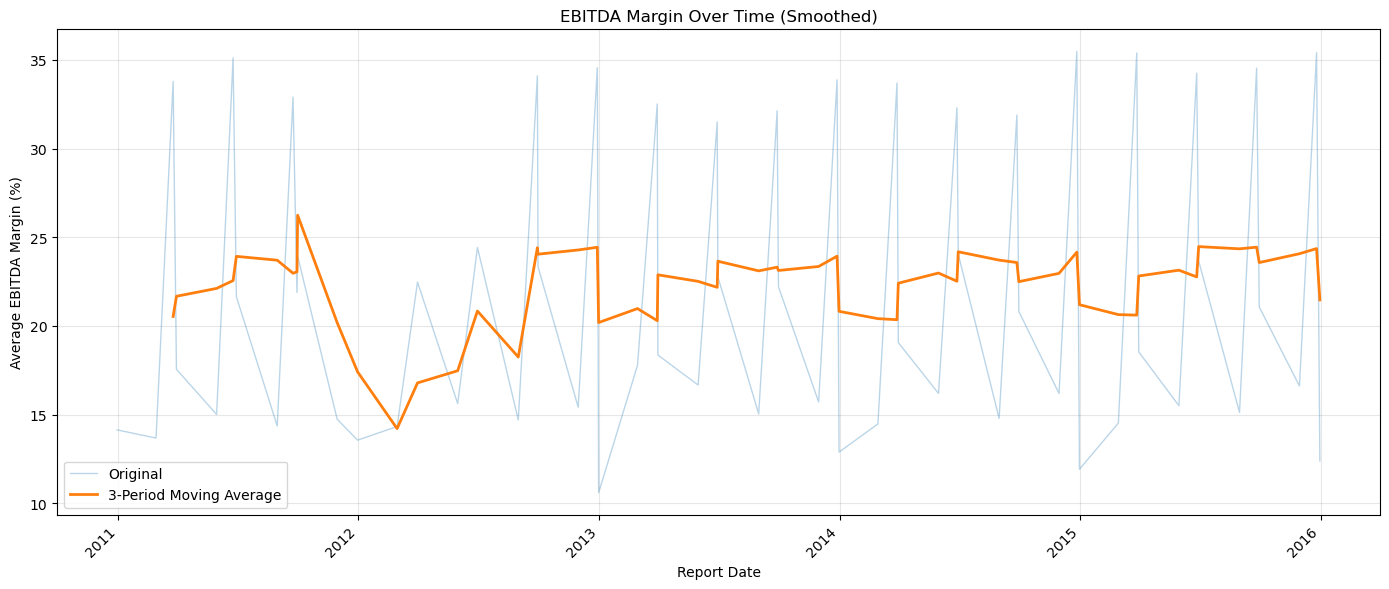

In [70]:
# Group data by report date and calculate the mean EBITDA Margin
time_trend = filtered_df.groupby('report_date')['amount'].mean()
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(time_trend.index, time_trend.values, alpha=0.3, label='Original', linewidth=1)
# Calculate a 3-period moving average (smoothing)
smoothed = time_trend.rolling(window=3).mean()
ax.plot(smoothed.index, smoothed.values, label='3-Period Moving Average', linewidth=2)
ax.set_xlabel('Report Date')
ax.set_ylabel('Average EBITDA Margin (%)')
ax.set_title('EBITDA Margin Over Time (Smoothed)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Findings: EBITDA Margin Over Time (Smoothed)

The time series plot above shows how the average EBITDA Margin has changed over time. The light blue line represents the original data, which fluctuates significantly due to short-term variations and reporting differences among companies. The orange line represents the 3-period moving average, which smooths out these short-term spikes and reveals the overall trend more clearly. 

From the smoothed line, we can observe that EBITDA margins tend to fluctuate seasonally but remain within a relatively consistent range of **15% to 25%** throughout the period from **2011 to 2016**. There are occasional dips, such as in **2012**, where margins briefly decline before recovering. Overall, the moving average trend suggests **stable profitability over time**, with no major long-term upward or downward shifts, indicating a balanced and steady financial performance across reporting periods.


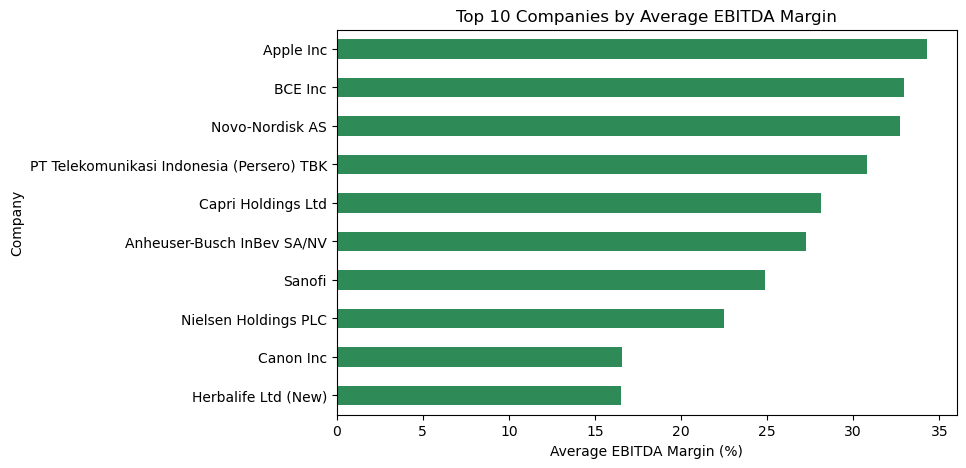

In [74]:
top_companies = filtered_df.groupby('company_name')['amount'].mean().nlargest(10)
top_companies.plot(kind='barh', color='seagreen', figsize=(8,5))
plt.title('Top 10 Companies by Average EBITDA Margin')
plt.xlabel('Average EBITDA Margin (%)')
plt.ylabel('Company')
plt.gca().invert_yaxis()  # Top company at the top
plt.show()


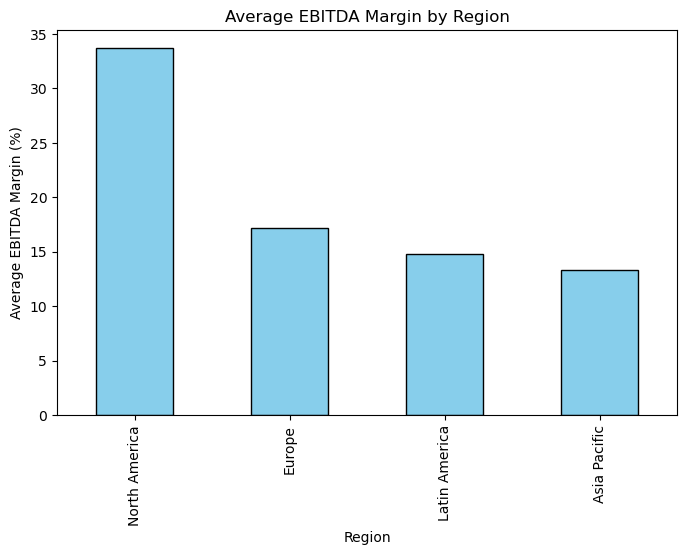

In [75]:
region_avg = filtered_df.groupby('region')['amount'].mean().sort_values(ascending=False)
region_avg.plot(kind='bar', figsize=(8,5), color='skyblue', edgecolor='black')
plt.title('Average EBITDA Margin by Region')
plt.ylabel('Average EBITDA Margin (%)')
plt.xlabel('Region')
plt.show()


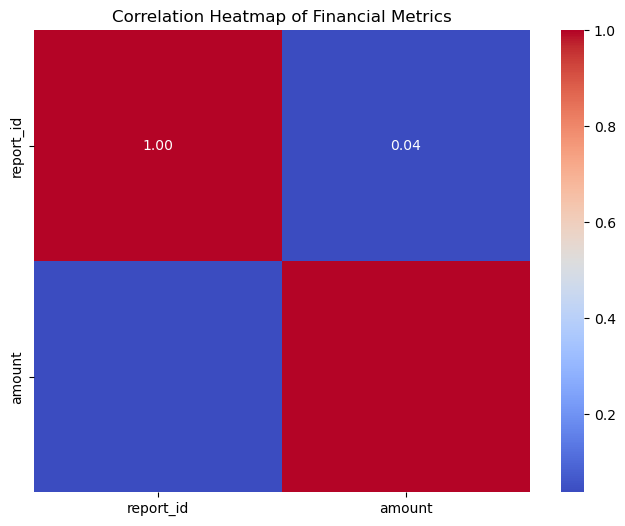

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Financial Metrics")
plt.show()
